In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
class KMeansClustering:

    def __init__(self,k=3): # 3 by default
        self.k=k
        self.centroids=None

    @staticmethod
    def euclideanDistance(data_point, centroids):
        return np.sqrt(np.sum((centroids-data_point)**2,axis=1))

    def fit(self, X, max_iterations=200):
        # keeping the random centroid initializations within the input data limit
        self.centroids=np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),size=(self.k,X.shape[1]))

        for _ in range(max_iterations):
            y=[]

            for data_point in X:
                distances=KMeansClustering.euclideanDistance(data_point,self.centroids)
                clusterNumber=np.argmin(distances) # the index value of the closest centeroid
                y.append(clusterNumber)

            y=np.array(y)

            cluster_indices=[]

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y==i))

            cluster_centres=[] # new/updated centre

            for i, indices in enumerate(cluster_indices):
                if len(indices)==0:
                    cluster_centres.append(self.centroids[i])
                else:
                    cluster_centres.append(np.mean(X[indices],axis=0)[0])

            if np.max(self.centroids-np.array(cluster_centres))<0.0001:
                break

            else:
                self.centroids=np.array(cluster_centres)
        return y


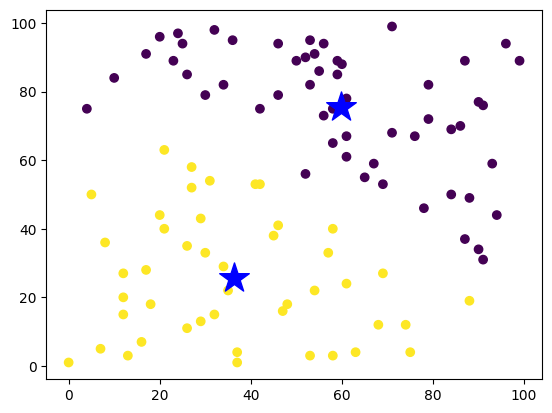

In [28]:
random_points=np.random.randint(0,100,(100,2))

kMeans=KMeansClustering(k=2)
labels=kMeans.fit(random_points)

plt.scatter(random_points[:,0],random_points[:,1],c=labels)
plt.scatter(kMeans.centroids[:,0],kMeans.centroids[:,1],c='blue',
            marker="*",s=500)

